# Figure 4 script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
font = {'size'   : 20}
mpl.rc('font', **font)
mpl.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
mpl.rc('axes', **axes_settings)

Now read the data:

In [3]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df = df.replace('varying: multi-pass', 0)   # replace some values in 'Template size (m)' with another flag
for field in ['Pixel spacing (m)',
              'Template size (m)',
              'SAV-uncertainty-x',
              'SAV-uncertainty-y',
              'SAV-peak-x',
              'SAV-peak-y',
              'LSR-uncertainty-nm',
              'LSR-uncertainty-sh',
              'pt0_vxdiff',
              'pt0_vydiff',
              'pt1_vxdiff',
              'pt1_vydiff',
              'pt2_vxdiff',
              'pt2_vydiff',
              'pt0_vxavgdiff',
              'pt0_vyavgdiff',
              'pt1_vxavgdiff',
              'pt1_vyavgdiff',
              'pt2_vxavgdiff',
              'pt2_vyavgdiff',
              'SAV-outlier-percent',
              'Invalid-pixel-percent']:
    df[field] = df[field].astype(float)

datestrs = ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']

# df

Now plot the figure:

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


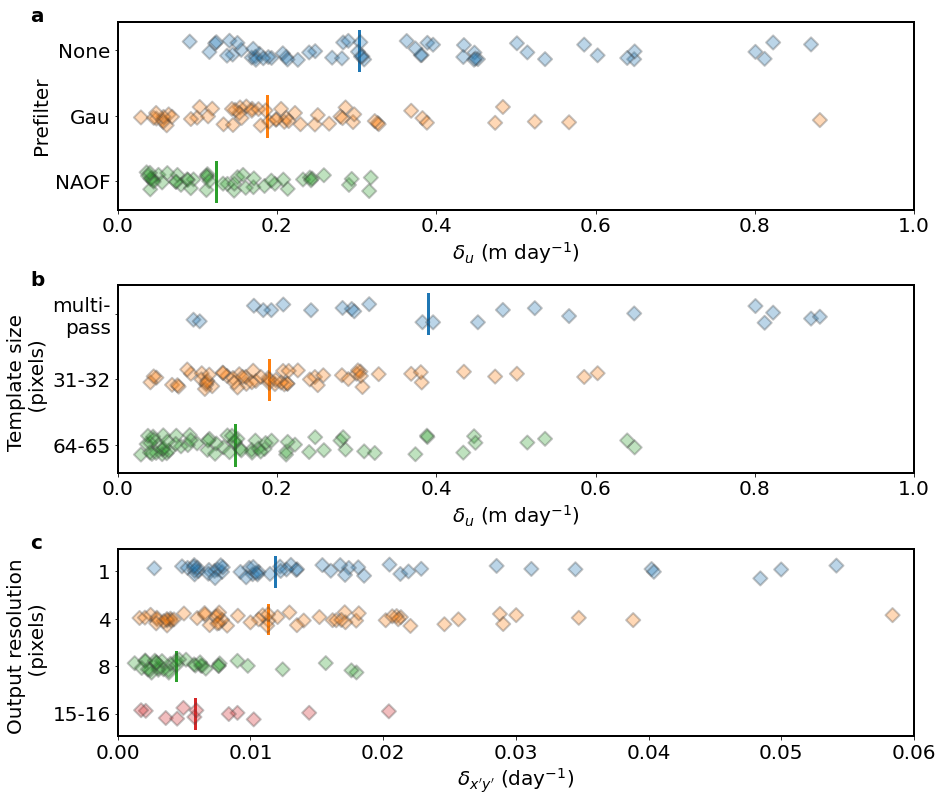

In [8]:
demo1 = df[df['Prefilter'] != 'LoG']
demo2 = df[df['Template size (px)'] != "48"]
demo3 = df[df['Pixel spacing (px)'] != "12"]

for idx, row in demo2.iterrows():
    if row['Template size (px)'] in ["64", "65"]:
        demo2.loc[idx, 'Template size (pixels)'] = "64-65"
    elif row['Template size (px)'] in ["31", "32"]:
        demo2.loc[idx, 'Template size (pixels)'] = "31-32"
    elif row['Template size (px)'] == 0:
        demo2.loc[idx, 'Template size (pixels)'] = "multi"
    else:
        demo2.loc[idx, 'Template size (pixels)'] = "else"
        
for idx, row in demo3.iterrows():
    if row['Pixel spacing (px)'] == "1":
        demo3.loc[idx, 'Pixel spacing (pixels)'] = "1"
    elif row['Pixel spacing (px)'] in ["4", "4.009", "4.003"]:
        demo3.loc[idx, 'Pixel spacing (pixels)'] = "~4"
    elif row['Pixel spacing (px)'] == "8":
        demo3.loc[idx, 'Pixel spacing (pixels)'] = "8"
    elif row['Pixel spacing (px)'] in ["15.13", "16.04"]:
        demo3.loc[idx, 'Pixel spacing (pixels)'] = "~16"
    else:
        demo3.loc[idx, 'Pixel spacing (pixels)'] = "else"

fig, axs = plt.subplots(3, 1, figsize=(13, 11), constrained_layout=True)

kawgs = {'jitter': 0.15, 'marker': 'D', 's': 10, 'alpha': 0.3, 'linewidth': 2, }

sns.stripplot(data=demo1, x="SAV-uncertainty-x", y="Prefilter", ax=axs[0], 
              order=['None', 'Gau', 'NAOF'], **kawgs)
sns.stripplot(data=demo2, x="SAV-uncertainty-x", y="Template size (pixels)", ax=axs[1], 
              order=['multi', '31-32', '64-65'], **kawgs)
sns.stripplot(data=demo3, x="LSR-uncertainty-sh", y="Pixel spacing (pixels)", ax=axs[2], **kawgs)

kawgs2 = {'linewidth': 3, }

tmp = demo1[demo1['Prefilter'] == 'None']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[0].plot([tmp_mean, tmp_mean], [-0.3, 0.3], **kawgs2)

tmp = demo1[demo1['Prefilter'] == 'Gau']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[0].plot([tmp_mean, tmp_mean], [0.7, 1.3], **kawgs2)

tmp = demo1[demo1['Prefilter'] == 'NAOF']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[0].plot([tmp_mean, tmp_mean], [1.7, 2.3], **kawgs2)
axs[0].set_xlabel('$\delta_u$ (m day$^{-1}$)')

tmp = demo2[demo2['Template size (pixels)'] == 'multi']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[1].plot([tmp_mean, tmp_mean], [-0.3, 0.3], **kawgs2)

tmp = demo2[demo2['Template size (pixels)'] == '31-32']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[1].plot([tmp_mean, tmp_mean], [0.7, 1.3], **kawgs2)

tmp = demo2[demo2['Template size (pixels)'] == '64-65']
tmp_mean = tmp['SAV-uncertainty-x'].median()
axs[1].plot([tmp_mean, tmp_mean], [1.7, 2.3], **kawgs2)
axs[1].set_xlabel('$\delta_u$ (m day$^{-1}$)')

tmp = demo3[demo3['Pixel spacing (pixels)'] == '1']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[2].plot([tmp_mean, tmp_mean], [-0.3, 0.3], **kawgs2)

tmp = demo3[demo3['Pixel spacing (pixels)'] == '~4']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[2].plot([tmp_mean, tmp_mean], [0.7, 1.3], **kawgs2)

tmp = demo3[demo3['Pixel spacing (pixels)'] == '8']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[2].plot([tmp_mean, tmp_mean], [1.7, 2.3], **kawgs2)

tmp = demo3[demo3['Pixel spacing (pixels)'] == '~16']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[2].plot([tmp_mean, tmp_mean], [2.7, 3.3], **kawgs2)
axs[2].set_xlabel("$\delta_{x'y'}$ (day$^{-1}$)")

axs[1].set_yticklabels(['multi-\npass', '31-32', '64-65'])
axs[2].set_yticklabels(['1', '4', '8', '15-16'])

axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[2].set_xlim(0, 0.06)

axs[0].text(-0.11, 1, "$\mathbf{a}$", transform=axs[0].transAxes)
axs[1].text(-0.11, 1, "$\mathbf{b}$", transform=axs[1].transAxes)
axs[2].text(-0.11, 1, "$\mathbf{c}$", transform=axs[2].transAxes)
axs[1].set_ylabel("Template size \n (pixels)")
axs[2].set_ylabel("Output resolution \n (pixels)")

# save figure
fig.patch.set_facecolor('xkcd:white')
fig.savefig('Fig4.png', dpi=200)